## Exploratory Data and Analysis

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [76]:
real = pd.read_csv('astraland_data.csv')
real

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [14]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
SalePrice                             5891 non-null int64
YearBuilt                             5891 non-null int64
YrSold                                5891 non-null int64
MonthSold                             5891 non-null int64
Size(sqf)                             5891 non-null int64
Floor                                 5891 non-null int64
HallwayType                           5891 non-null object
HeatingType                           5891 non-null object
AptManageType                         5891 non-null object
N_Parkinglot(Ground)                  5891 non-null float64
N_Parkinglot(Basement)                5891 non-null float64
TimeToBusStop                         5891 non-null object
TimeToSubway                          5891 non-null object
N_APT                                 5891 non-null float64
N_manager                             5891 non-null float64
N_elevator

In [15]:
real.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,5.613648,6.310304,...,0.941436,1.941266,0.654218,3.022407,2.417756,2.659311,2.764726,5.809540,9.870820,10.864200
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,2.811831,3.174088,...,0.401355,2.201392,0.658320,0.954575,1.037898,1.556041,1.489289,2.330804,3.450319,4.438513
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,3.000000,5.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,1.000000,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,2.000000,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000


In [16]:
real.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


#### Divide Data to Explore (Numerik dan Kategorikal)

In [19]:
# function to divide data by data type

def bagi_data(real):
    real_bagi = {'number': [], 'string': []}
    for i in real.columns:
        # Numeric data
        if real[i].dtype=='int64':
            real_bagi['number'].append(i)
        elif real[i].dtype=='float64':
            real_bagi['number'].append(i)
        # Categorical data
        else:
            real_bagi['string'].append(i)
    return real_bagi

In [21]:
# divide data
data = bagi_data(real)

In [23]:
data

{'number': ['SalePrice',
  'YearBuilt',
  'YrSold',
  'MonthSold',
  'Size(sqf)',
  'Floor',
  'N_Parkinglot(Ground)',
  'N_Parkinglot(Basement)',
  'N_APT',
  'N_manager',
  'N_elevators',
  'N_FacilitiesNearBy(PublicOffice)',
  'N_FacilitiesNearBy(Hospital)',
  'N_FacilitiesNearBy(Dpartmentstore)',
  'N_FacilitiesNearBy(Mall)',
  'N_FacilitiesNearBy(ETC)',
  'N_FacilitiesNearBy(Park)',
  'N_SchoolNearBy(Elementary)',
  'N_SchoolNearBy(Middle)',
  'N_SchoolNearBy(High)',
  'N_SchoolNearBy(University)',
  'N_FacilitiesInApt',
  'N_FacilitiesNearBy(Total)',
  'N_SchoolNearBy(Total)'],
 'string': ['HallwayType',
  'HeatingType',
  'AptManageType',
  'TimeToBusStop',
  'TimeToSubway',
  'SubwayStation']}

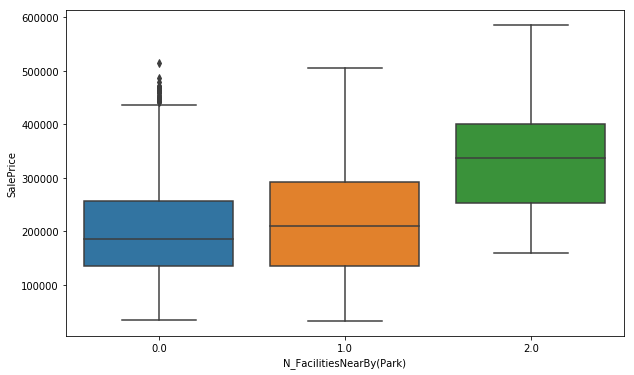

In [75]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='N_FacilitiesNearBy(Park)', y='SalePrice', data=real)

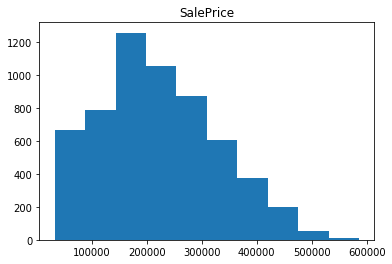

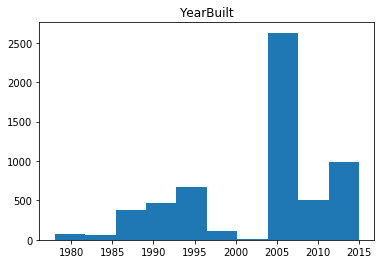

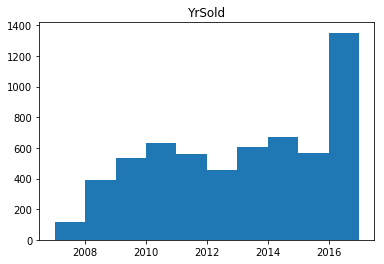

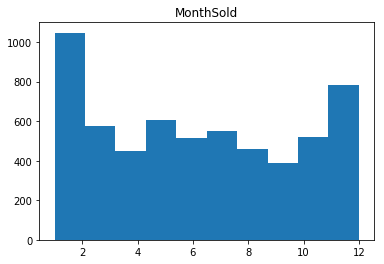

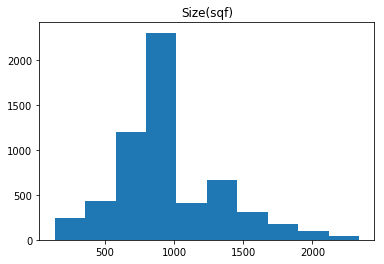

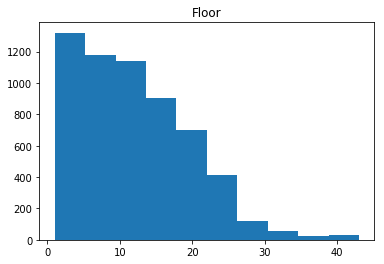

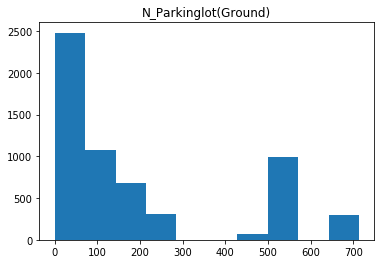

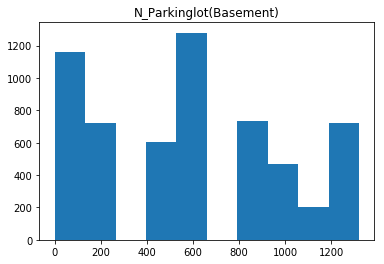

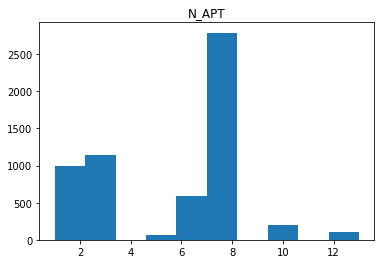

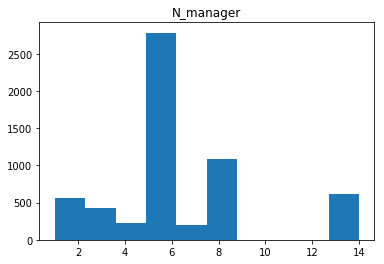

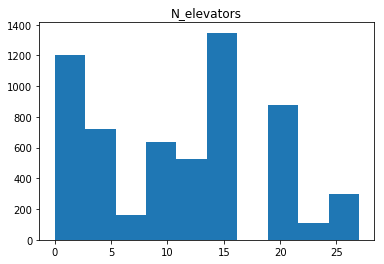

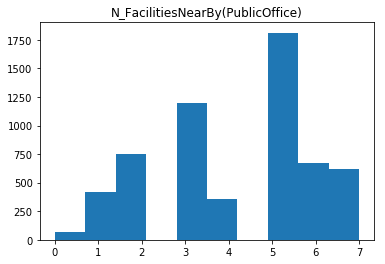

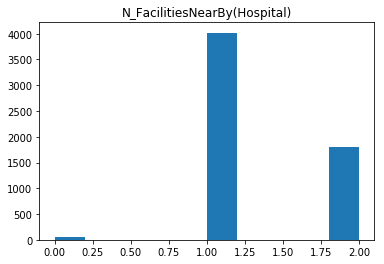

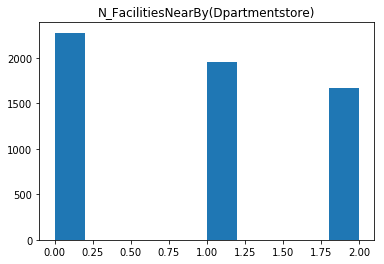

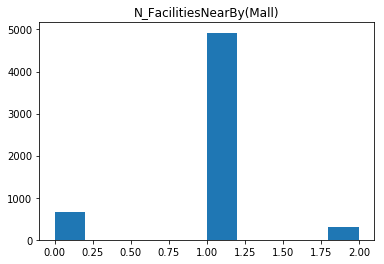

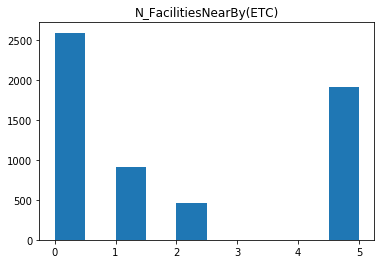

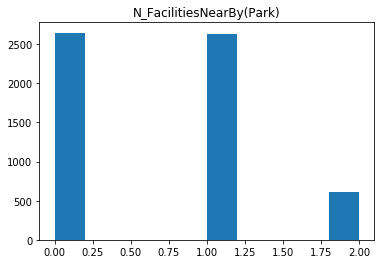

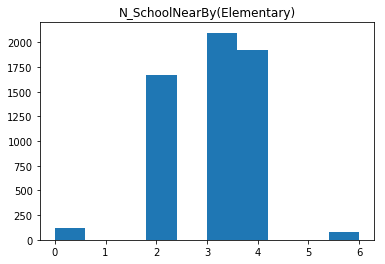

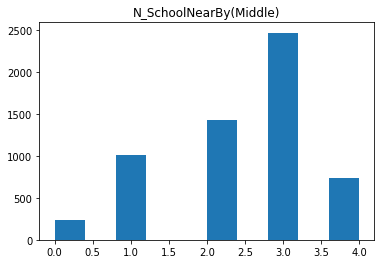

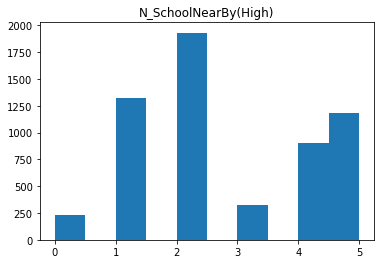

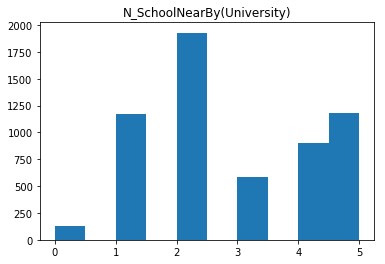

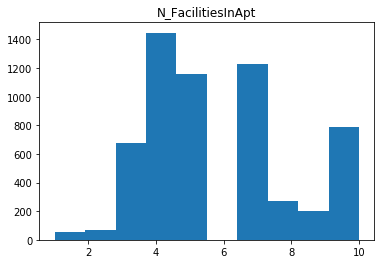

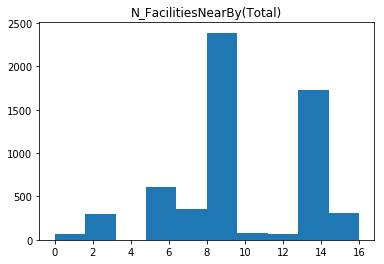

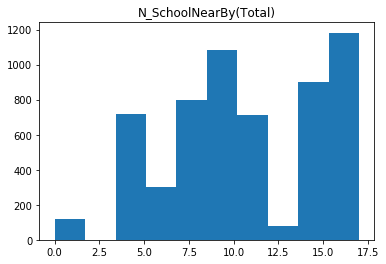

In [26]:
#Plot Numerik ("number")

for i in data['number']:
    plt.hist(real[i])
    plt.title(i)
    plt.show()

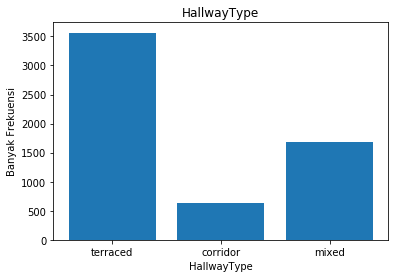

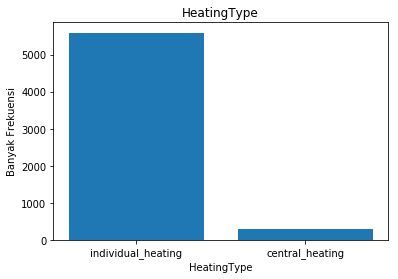

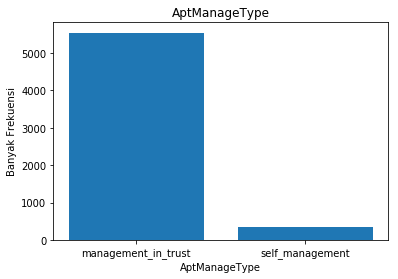

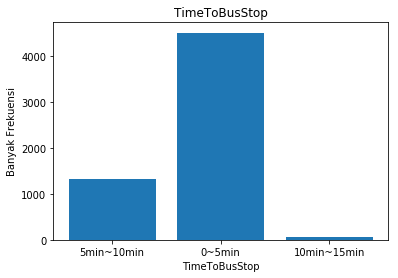

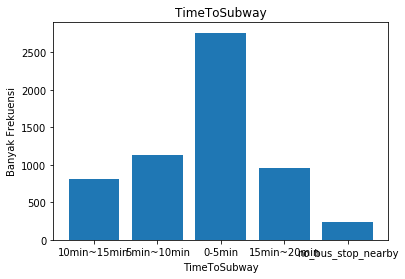

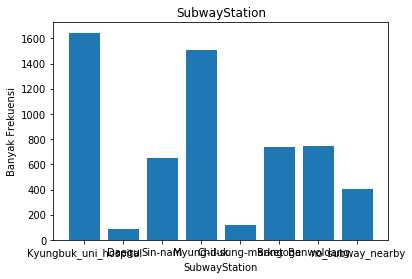

In [28]:
# plot kategorikal ('string')

for i in data['string']:
    # count frequency
    dic = Counter(real[i])
    k = dic.keys()
    v = dic.values()
    
    # set plt options
    y_pos = np.arange(len(k))
    plt.bar(y_pos, v, align='center')
    plt.xticks(y_pos, k)
    plt.ylabel('Banyak Frekuensi')
    plt.xlabel(i)
    plt.title(i)
    plt.show()

### EDA HallwayType and YearBuilt

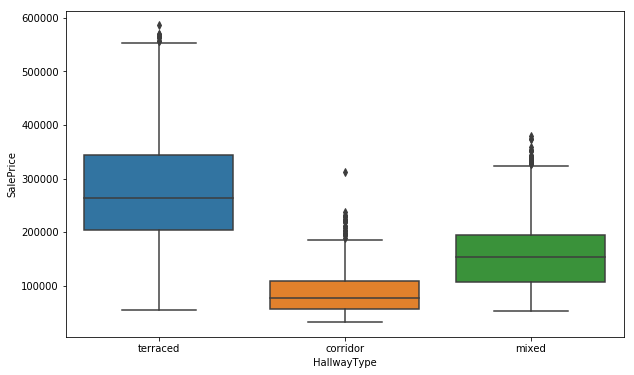

In [40]:
plt.subplots(figsize=(10,6))
sns.boxplot(x='HallwayType', y='SalePrice', data=real)

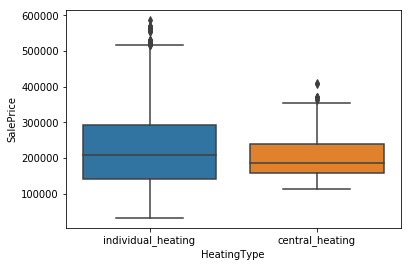

In [41]:
sns.boxplot(x='HeatingType', y='SalePrice', data=real)

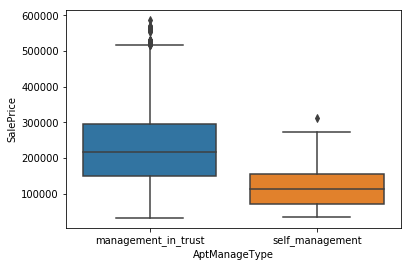

In [43]:
sns.boxplot(x='AptManageType', y='SalePrice', data=real)

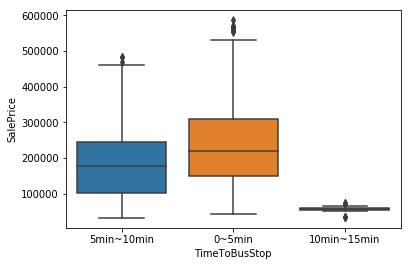

In [44]:
sns.boxplot(x='TimeToBusStop', y='SalePrice', data=real)

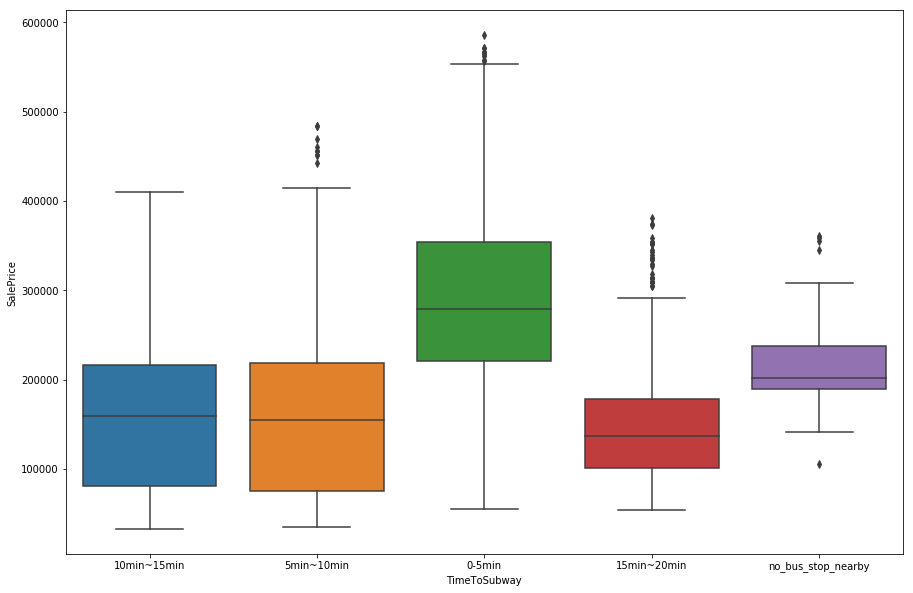

In [45]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='TimeToSubway', y='SalePrice', data=real)

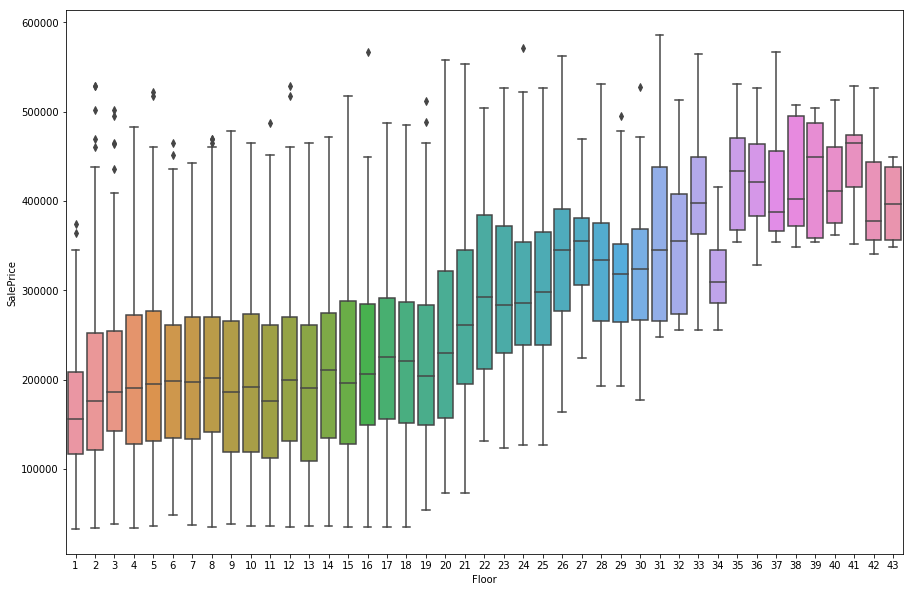

In [47]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='Floor', y='SalePrice', data=real)

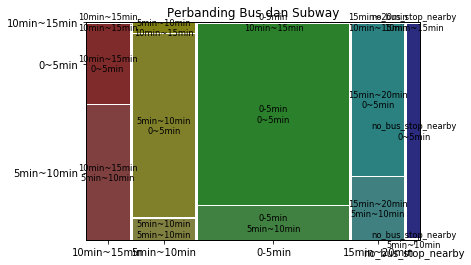

In [53]:
from statsmodels.graphics import mosaicplotwaww
ax = mosaicplot.mosaic(real, ['TimeToSubway', 'TimeToBusStop'], gap=0.01, title='Perbanding Bus dan Subway')

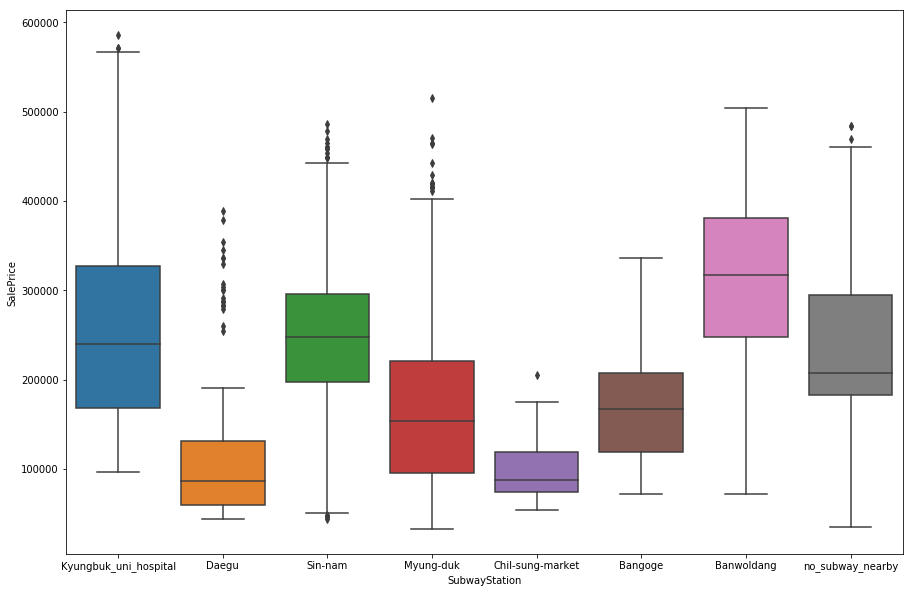

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(x='SubwayStation', y='SalePrice', data=real, ax=ax)

## Correlation for Each Features

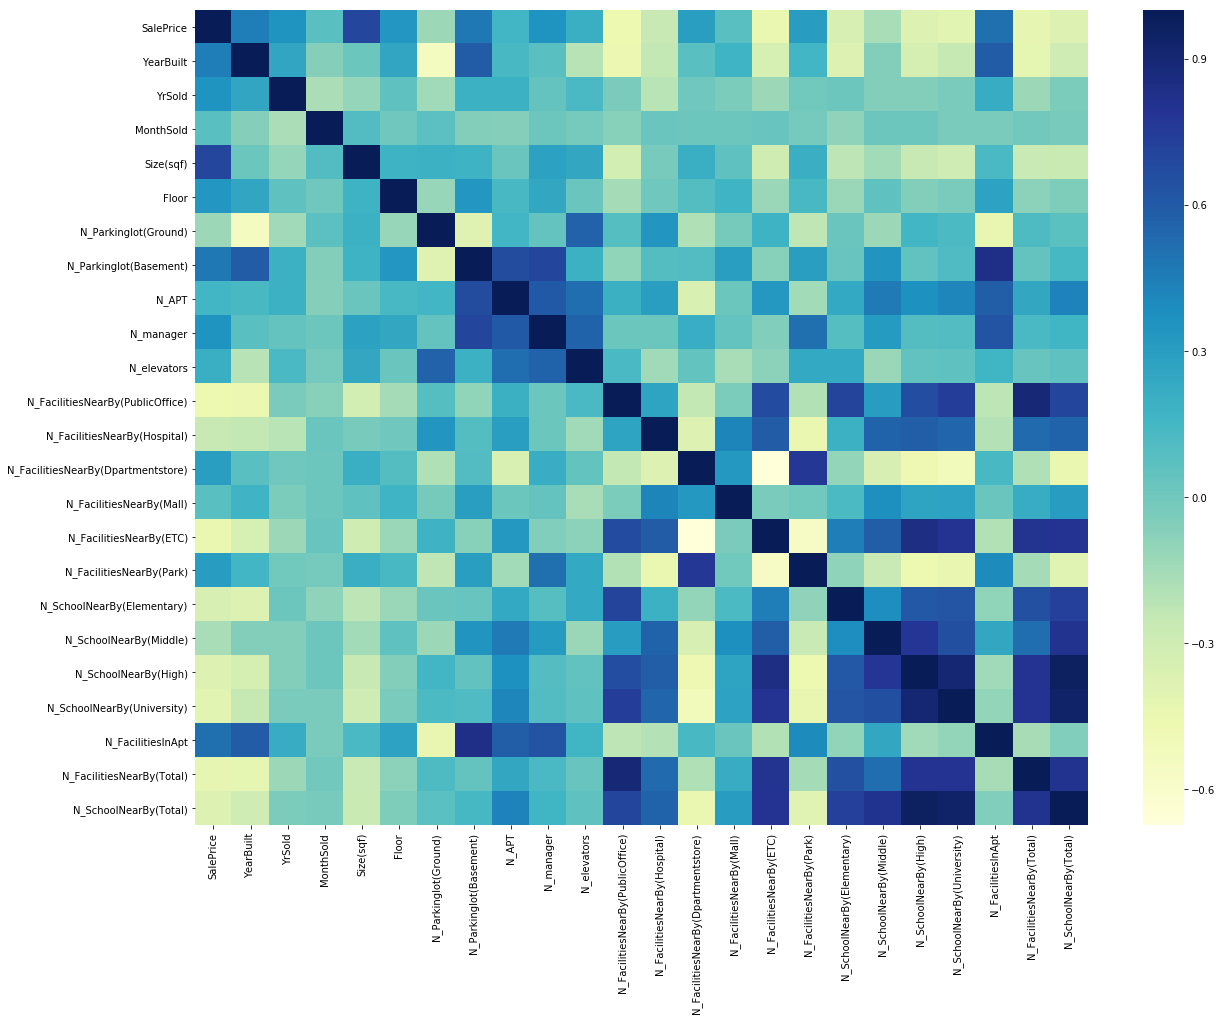

In [60]:
plt.subplots(figsize=(20,15))
corr = real.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [59]:
real.corr()['SalePrice'].sort_values()

N_FacilitiesNearBy(PublicOffice)     -0.462234
N_FacilitiesNearBy(ETC)              -0.442299
N_FacilitiesNearBy(Total)            -0.419763
N_SchoolNearBy(University)           -0.403080
N_SchoolNearBy(Total)                -0.377904
N_SchoolNearBy(High)                 -0.371840
N_SchoolNearBy(Elementary)           -0.341186
N_FacilitiesNearBy(Hospital)         -0.257282
N_SchoolNearBy(Middle)               -0.166439
N_Parkinglot(Ground)                 -0.130549
MonthSold                             0.081924
N_FacilitiesNearBy(Mall)              0.082979
N_APT                                 0.162684
N_elevators                           0.208248
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_FacilitiesNearBy(Park)              0.310906
Floor                                 0.336729
YrSold                                0.357682
N_manager                             0.358329
YearBuilt                             0.447875
N_Parkinglot(Basement)                0.473252
N_FacilitiesI

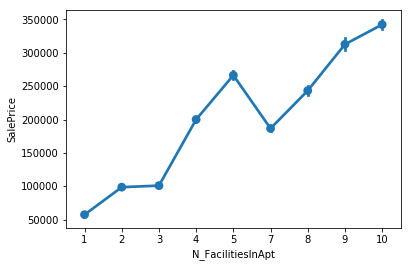

In [61]:
sns.pointplot(x='N_FacilitiesInApt', y='SalePrice', data=real)

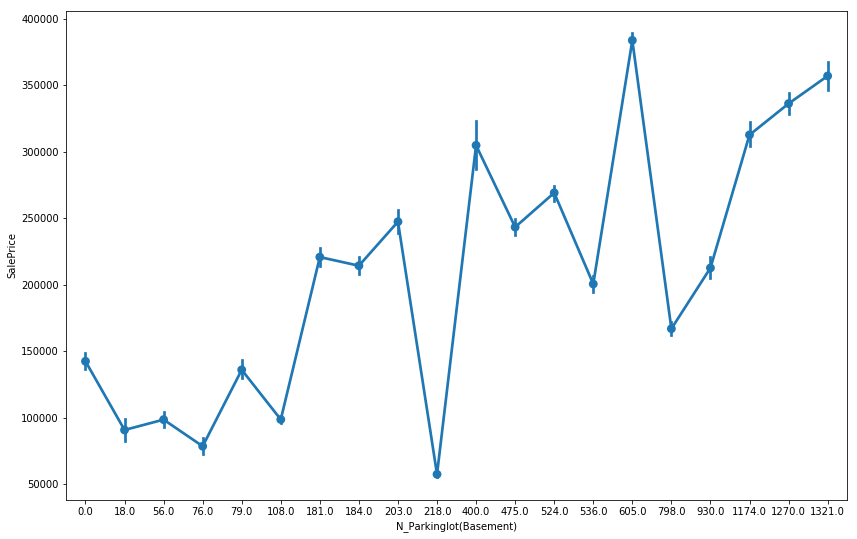

In [66]:
plt.subplots(figsize=(14,9))
sns.pointplot(x='N_Parkinglot(Basement)', y='SalePrice', data=real)

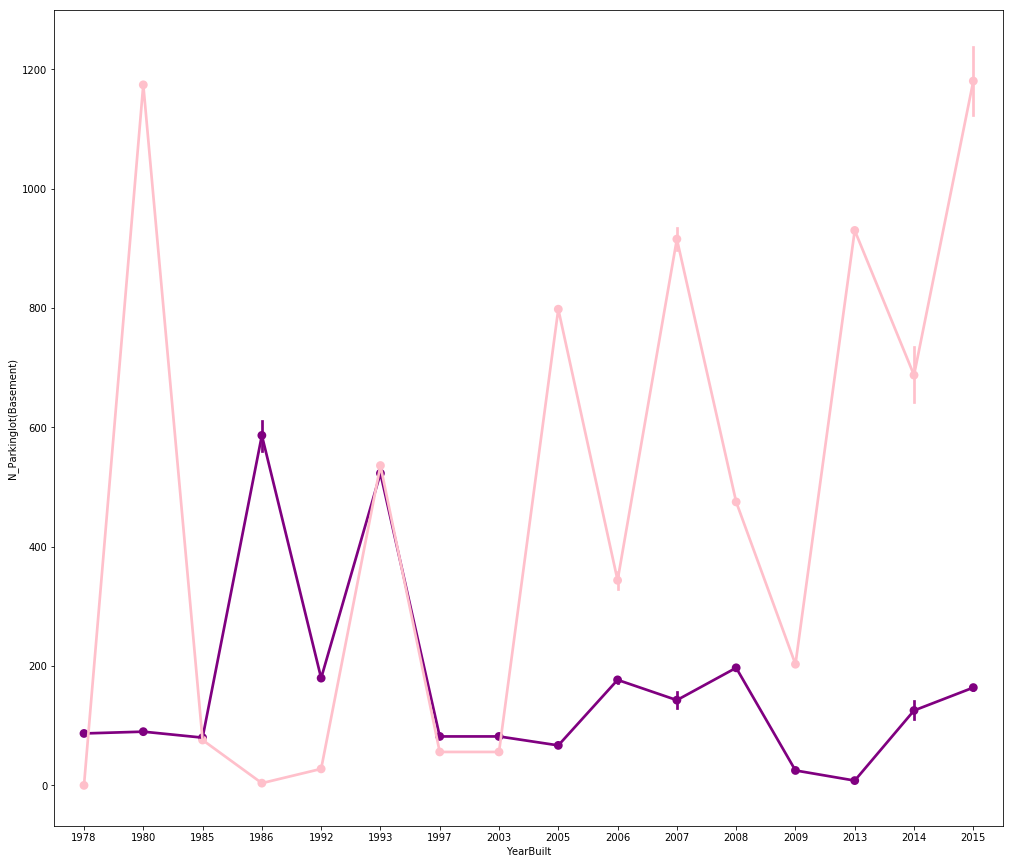

In [72]:
# redline: number of parkinglot on the ground
# blueline: number of parkinglot under the ground

plt.subplots(figsize=(17,15))
sns.pointplot(x='YearBuilt', y='N_Parkinglot(Ground)', data=real, color="purple")
sns.pointplot(x='YearBuilt', y='N_Parkinglot(Basement)', data=real, color="pink")

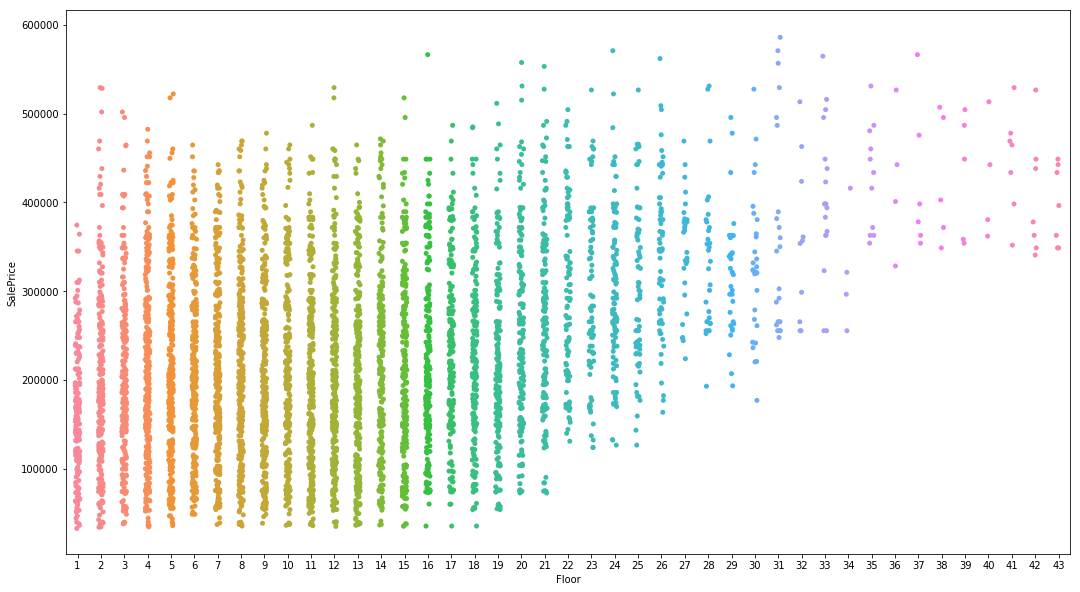

In [73]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.stripplot(x='Floor', y='SalePrice', data=real)

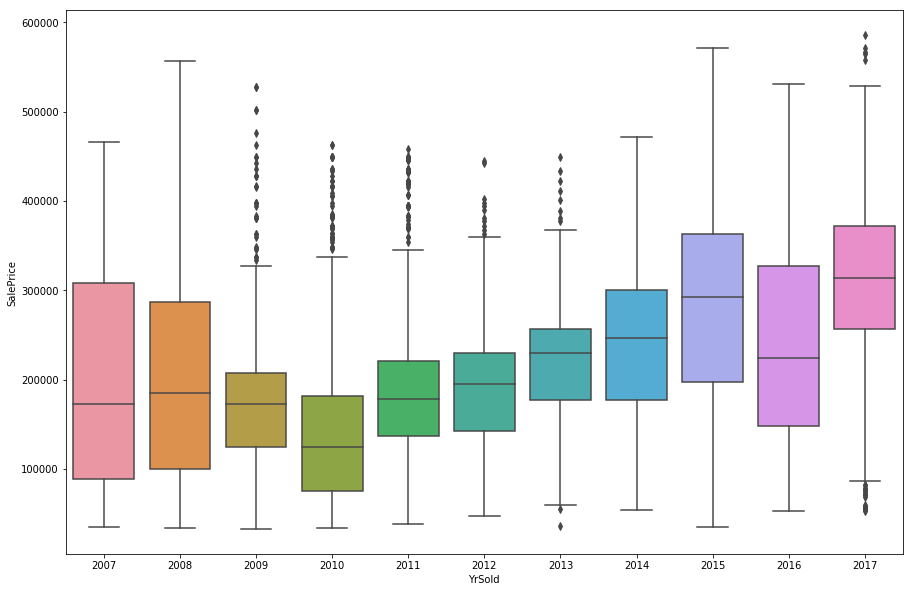

In [74]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='YrSold', y='SalePrice', data=real)